In [1]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 419.4 kB/s eta 0:00:06
     ------ --------------------------------- 0.5/3.0 MB 419.4 kB/s eta 0:00:06
     ------ --------------------------------- 0.5/3.0 MB 419.4 kB/s eta 0:00:06
     ---------- ----------------------------- 0.8/

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [3]:
# Download Google stock data (GOOG) for the last 5 years
print("Downloading stock data...")
data = yf.download('GOOG', start='2018-01-01', end='2024-01-01')
data_close = data[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_close)

In [7]:
# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

In [8]:
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

In [9]:
# Reshape for RNN input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [10]:
# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [12]:
# Build the RNN model
model = Sequential([
SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
Dense(1) 
])


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
print("Training the model...")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test,y_test))

Training the model...
Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1101 - val_loss: 0.0026
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.5384e-04 - val_loss: 0.0011
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.2378e-04 - val_loss: 0.0010
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.4892e-04 - val_loss: 0.0010
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.7377e-04 - val_loss: 0.0011
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.7652e-04 - val_loss: 9.7116e-04
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.4642e-04 - val_loss: 0.0011
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.2920e-04 - val_loss: 8.8674e-04
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.2029e-04 - val_loss: 8.6644e-04
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.6166e-04 - val_loss: 

In [15]:
# Predict
print("Predicting stock prices...")
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1,1))
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

Predicting stock prices...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


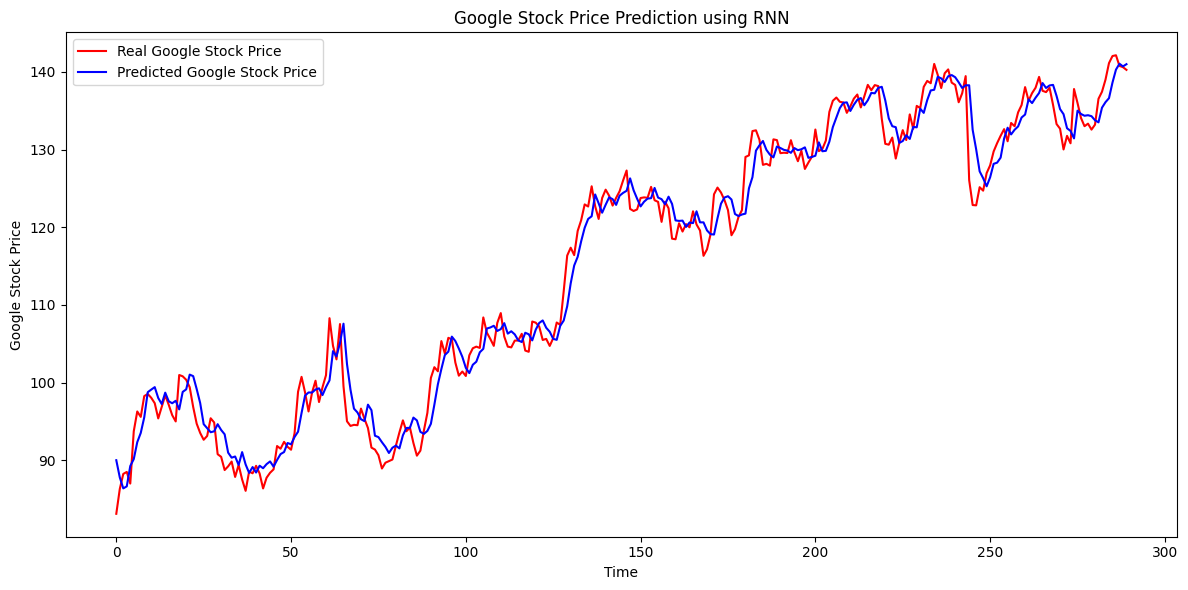

In [16]:
# Plotting results
plt.figure(figsize=(12,6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.tight_layout()
plt.show()